In [17]:
import numpy as np
import pandas as pd
!pip install -q fasteda
from fasteda import fast_eda
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -q adtk
from adtk.detector import InterQuartileRangeAD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00


In [18]:
df = pd.read_csv ("/content/sample_data/manufacturing.csv")

       Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
count       3957.000000     3957.000000             3957.000000   
mean         200.034704       14.815558             2955.321308   
std           58.135717        5.772040             1458.224940   
min          100.014490        5.003008              513.706875   
25%          150.871296        9.692984             1798.247303   
50%          198.603371       14.832557             2678.277782   
75%          251.366552       19.749680             3929.058261   
max          299.992804       24.999132             7365.018714   

       Material Fusion Metric  Material Transformation Metric  Quality Rating  
count             3957.000000                    3.957000e+03     3957.000000  
mean             48127.183128                    1.003645e+07       96.260179  
std              23812.213513                    7.599356e+06       12.992262  
min              10156.971960                    9.999462e+05        1.00000

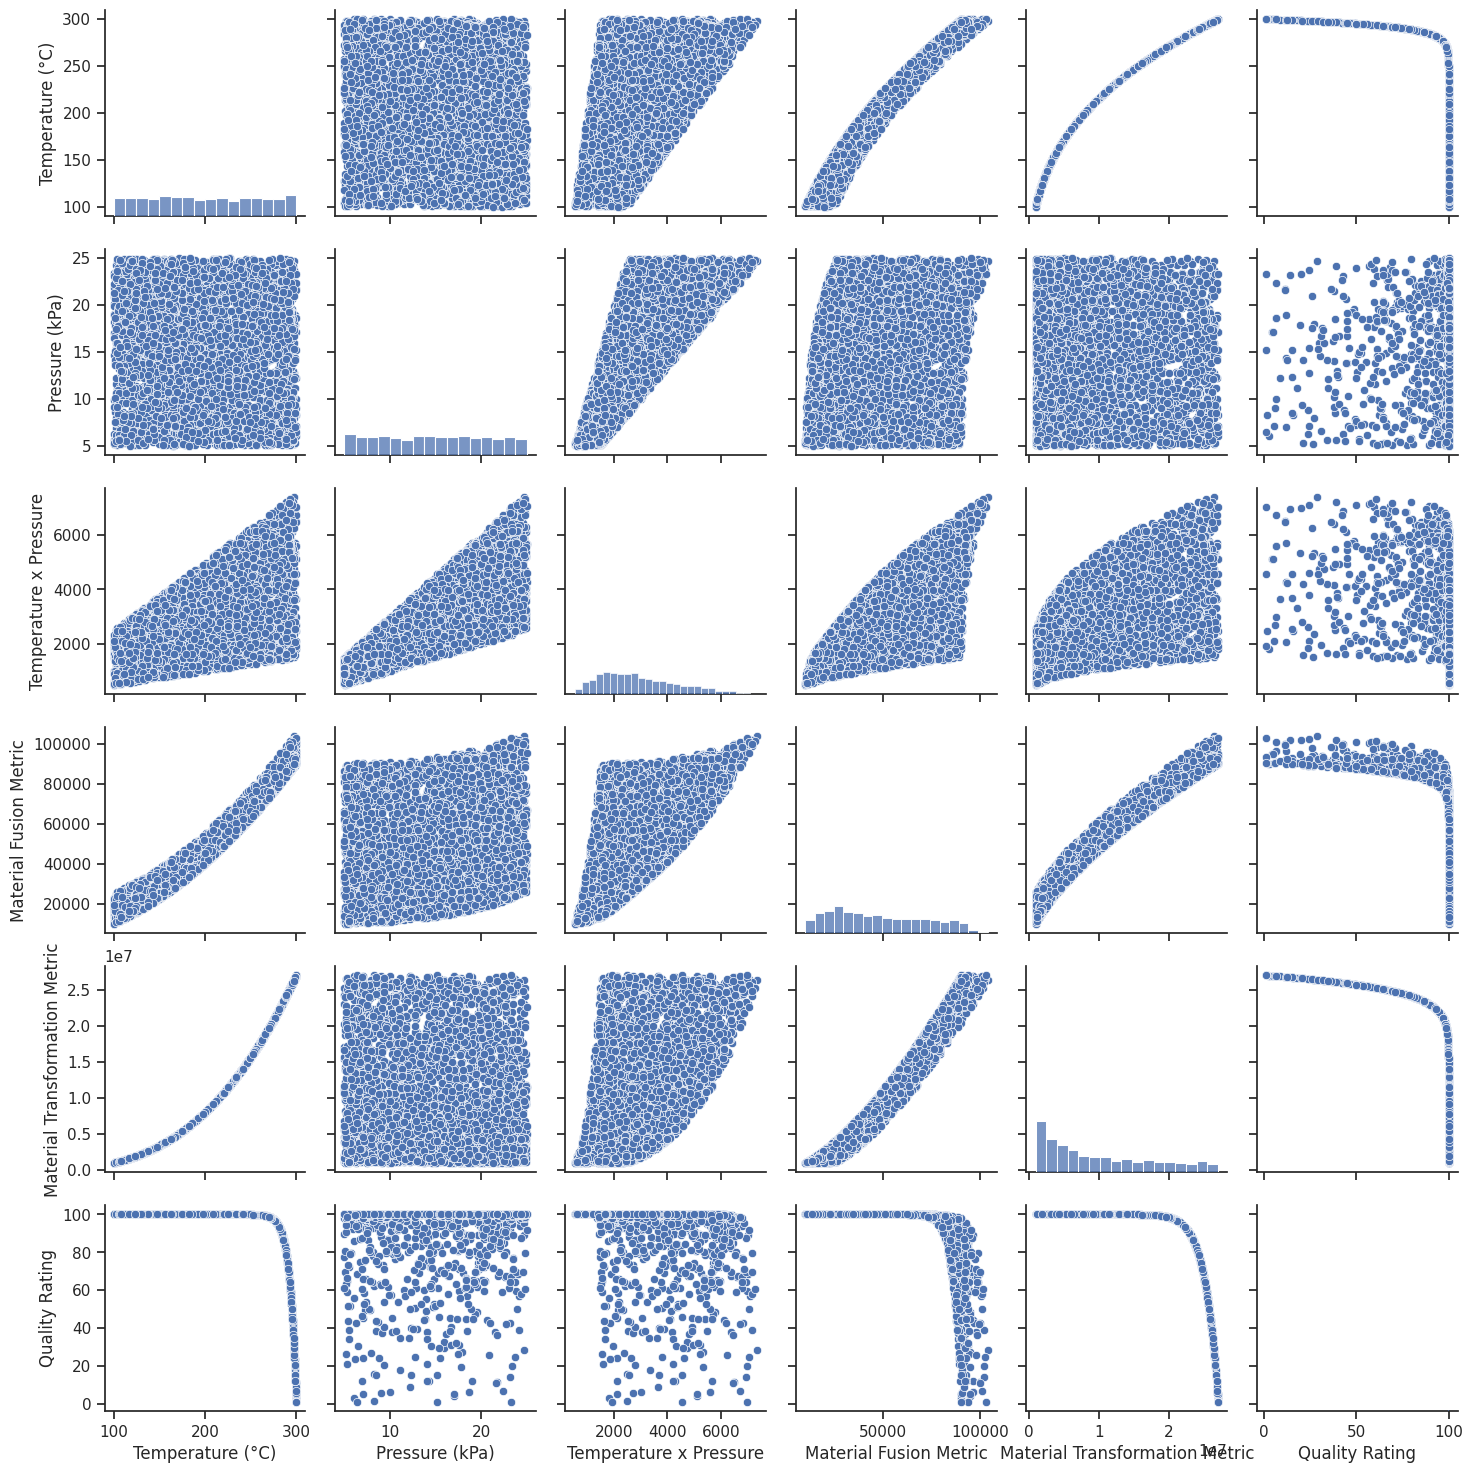

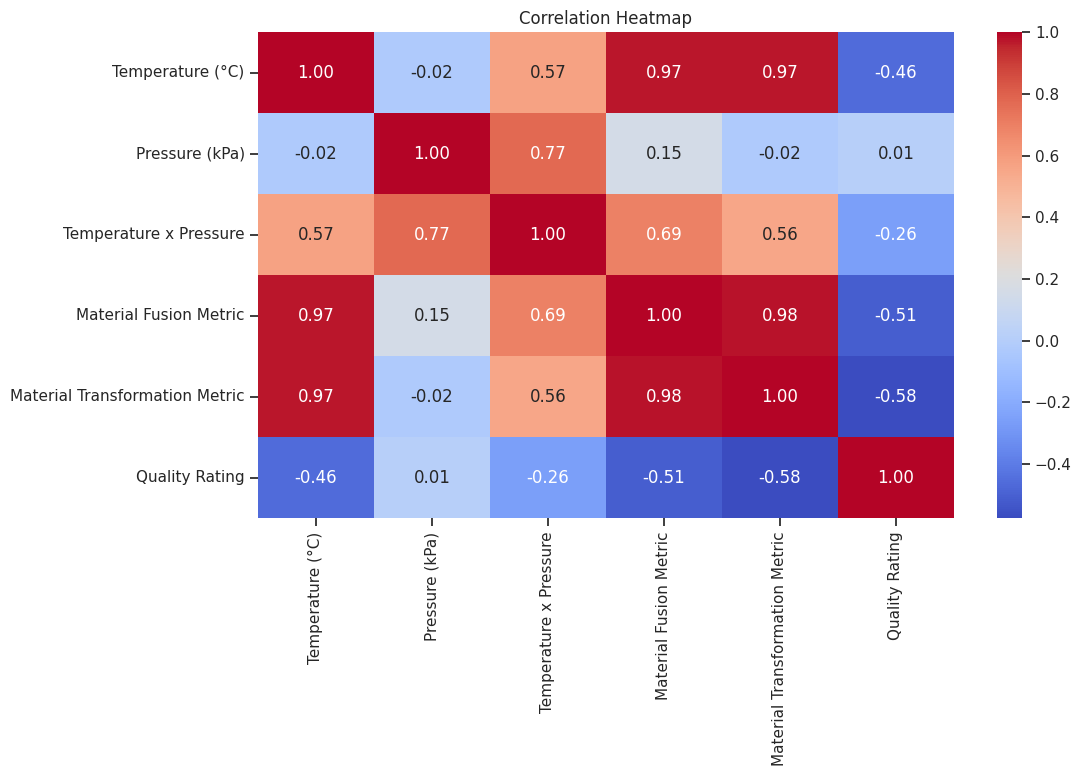

In [55]:
print(df.describe())
print(df.isnull().sum())

sns.set(style="ticks")

sns.pairplot(df, vars=['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
                      'Material Fusion Metric', 'Material Transformation Metric', 'Quality Rating'])
plt.show()
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.21707,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.76500,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.95025,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.88155,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.20128,6.303792e+06,100.000000


from matplotlib import pyplot as plt
_df_0['Temperature (°C)'].plot(kind='hist', bins=20, title='Temperature (°C)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Pressure (kPa)'].plot(kind='hist', bins=20, title='Pressure (kPa)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Temperature x Pressure'].plot(kind='hist', bins=20, title='Temperature x Pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Material Fusion Metric'].plot(kind='hist', bins=20, title='Material Fusion Metric')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Temperature (°C)', y='Pressure (kPa)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Pressure (kPa)', y='Temperature x Pressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Temperature x Pressure', y='Material Fusion Metric', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Material Fusion Metric', y='Material Transformation Metric', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Temperature (°C)'].plot(kind='line', figsize=(8, 4), title='Temperature (°C)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Pressure (kPa)'].plot(kind='line', figsize=(8, 4), title='Pressure (kPa)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Temperature x Pressure'].plot(kind='line', figsize=(8, 4), title='Temperature x Pressure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Material Fusion Metric'].plot(kind='line', figsize=(8, 4), title='Material Fusion Metric')
plt.gca().spines[['top', 'right']].set_visible(False)

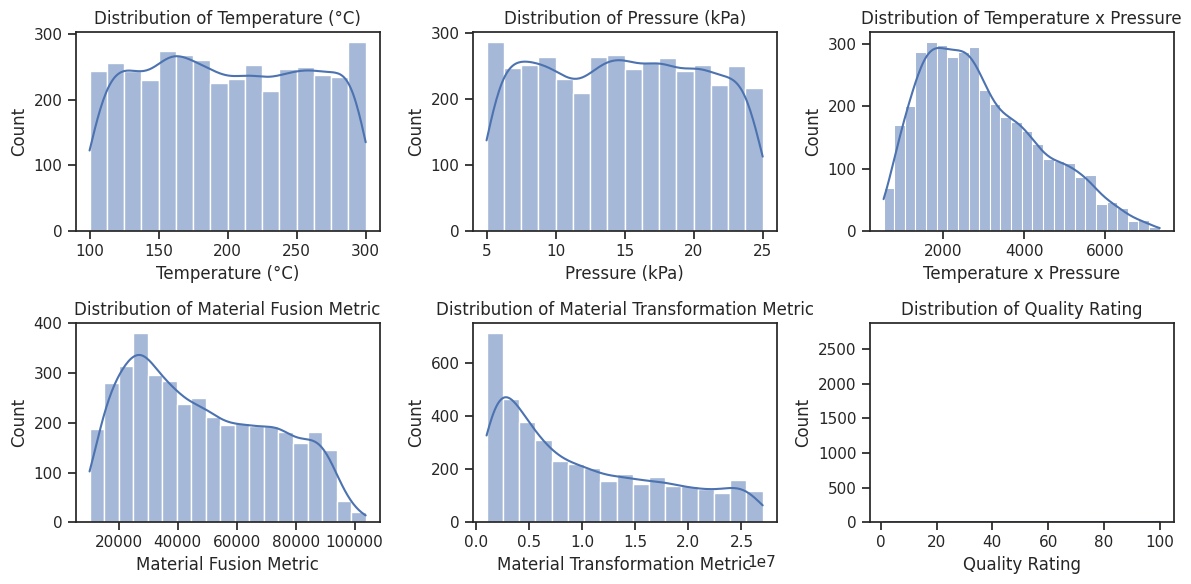

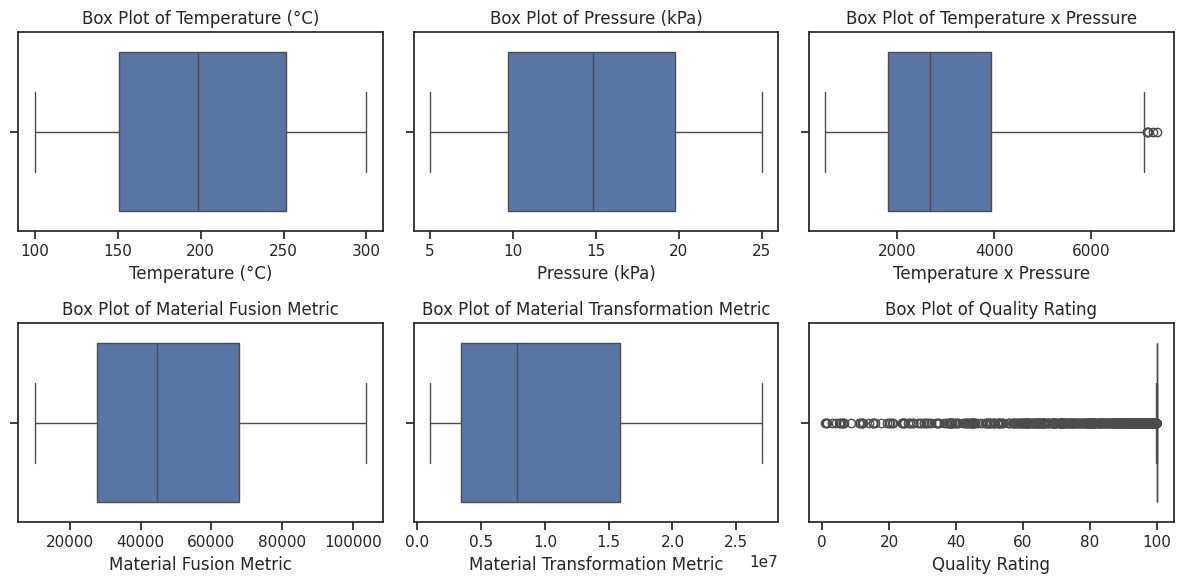

In [56]:

plt.figure(figsize=(12, 6))
numerical_columns = df.columns
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

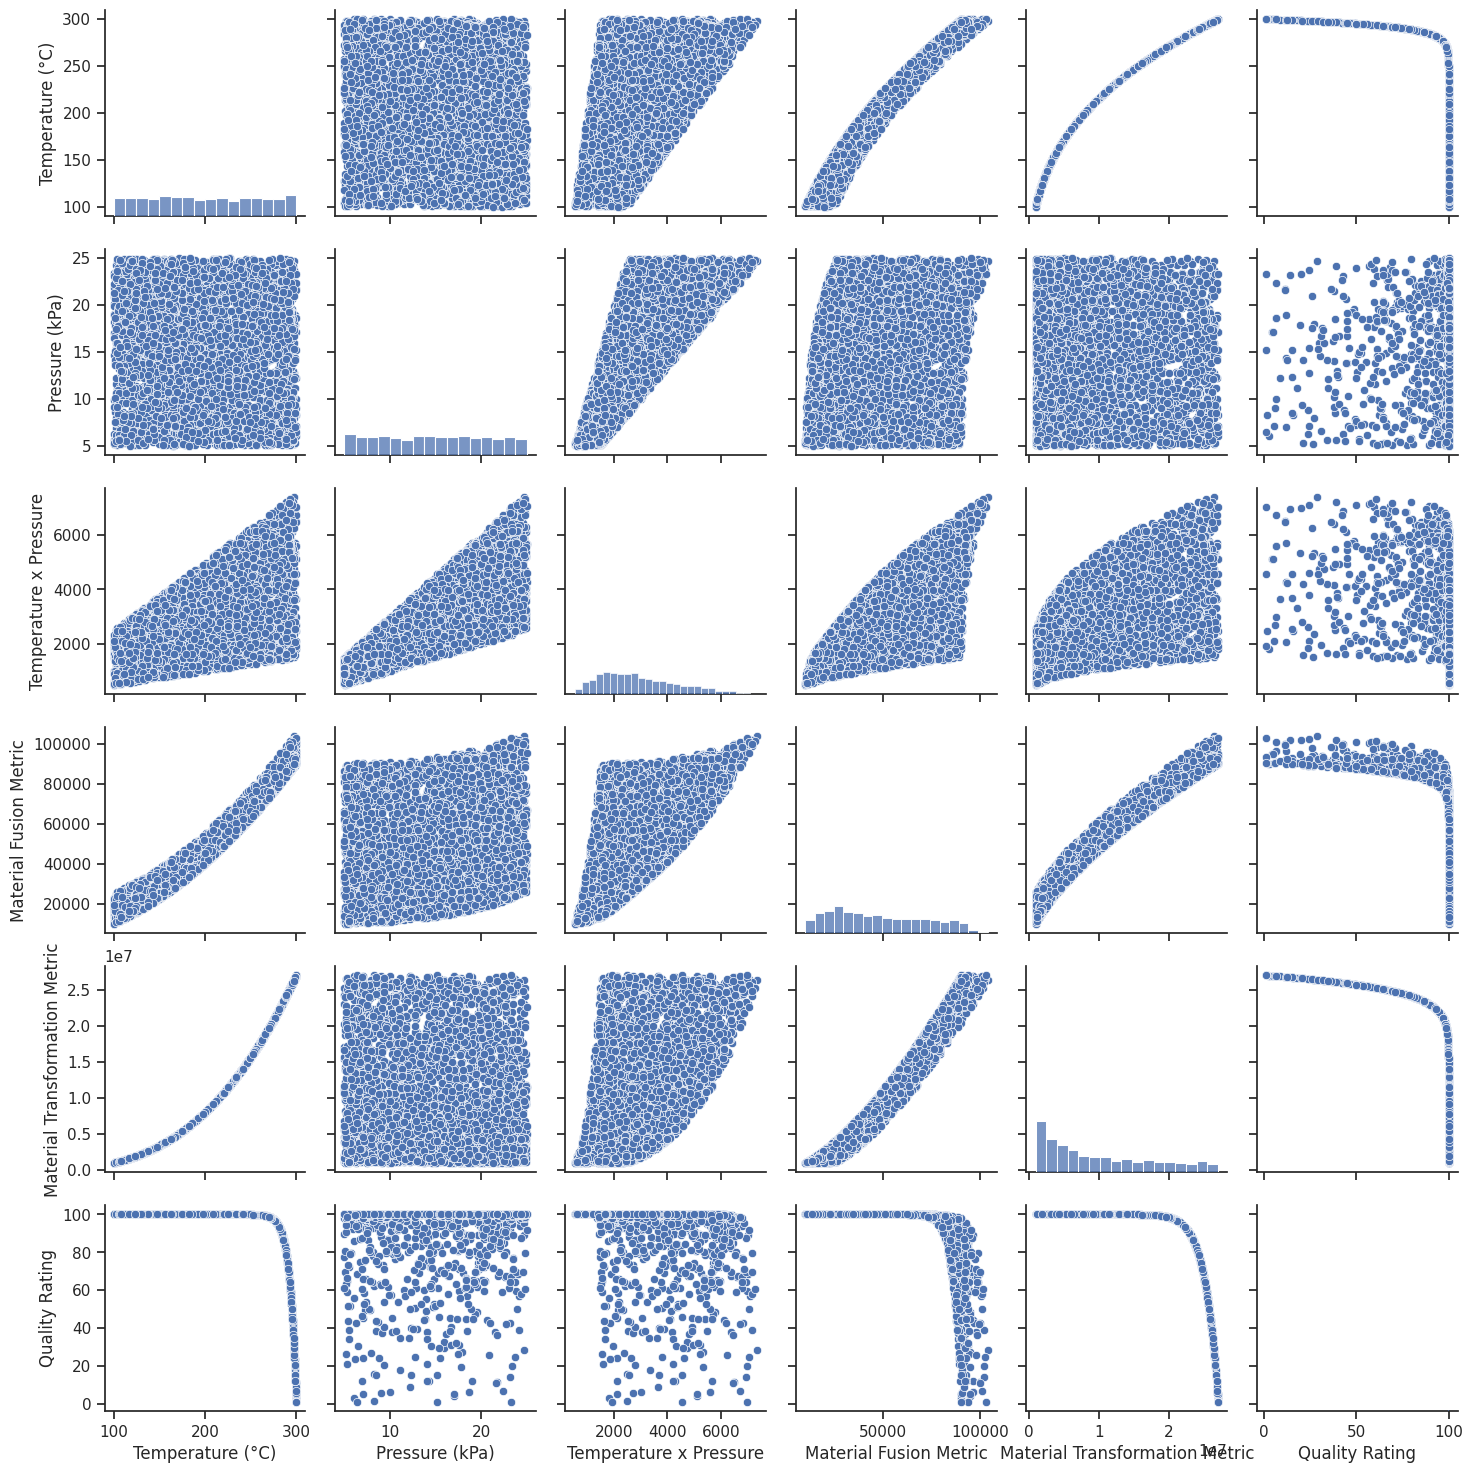

In [22]:
g = sns.pairplot(df)

In [57]:
df_train = pd.concat([y_train, X_train], axis=1, sort=True)
Temperature_train = df_train["Temperature (°C)"].values.reshape(-1,1)
Pressure_train = df_train["Pressure (kPa)"].values.reshape(-1,1)
TempPress_train = df_train["Temperature x Pressure"].values.reshape(-1,1)
Fusion_train = df_train["Material Fusion Metric"].values.reshape(-1,1)
Transformation_train = df_train["Material Transformation Metric"].values.reshape(-1,1)

In [58]:
df_test = pd.concat([y_test, X_test], axis=1, sort=True)
Temperature_test = df_test["Temperature (°C)"].values.reshape(-1, 1)
Pressure_test = df_test["Pressure (kPa)"].values.reshape(-1, 1)
TempPress_test = df_test["Temperature x Pressure"].values.reshape(-1, 1)
Fusion_test = df_test["Material Fusion Metric"].values.reshape(-1, 1)
Transformation_test = df_test["Material Transformation Metric"].values.reshape(-1, 1)

In [59]:
poly_features = PolynomialFeatures(degree =  13)
Temperature_train = poly_features.fit_transform(Temperature_train)
Temperature_test  = poly_features.fit_transform(Temperature_test)

poly_features = PolynomialFeatures(degree =  best_degrees["Pressure (kPa)"])
Pressure_train = poly_features.fit_transform(Pressure_train)
Pressure_test  = poly_features.fit_transform(Pressure_test)

poly_features = PolynomialFeatures(degree = 5)
TempPress_train = poly_features.fit_transform(TempPress_train)
TempPress_test  = poly_features.fit_transform(TempPress_test)

poly_features = PolynomialFeatures(degree  = 5)
Fusion_train= poly_features.fit_transform(Fusion_train)
Fusion_test  = poly_features.fit_transform(Fusion_test)

poly_features = PolynomialFeatures(degree  = 10)
Transformation_train = poly_features.fit_transform(Transformation_train)
Transformation_test  = poly_features.fit_transform(Transformation_test)

In [60]:
X_train1 = np.concatenate((Temperature_train,Pressure_train,TempPress_train,Fusion_train,Transformation_train),axis =1)
X_test1 = np.concatenate((Temperature_test, Pressure_test, TempPress_test, Fusion_test, Transformation_test), axis=1)

In [61]:
# Assuming you have a DataFrame X_train

# Cartesian product between 'Pressure (kPa)' and 'Temperature (°C)'
X_train["int1"] = X_train["Pressure (kPa)"].mul(X_train["Temperature (°C)"])

# Cartesian product between 'Temperature x Pressure' and 'Temperature (°C)'
X_train["int2"] = X_train["Temperature x Pressure"].mul(X_train["Temperature (°C)"])

# Cartesian product between 'Material Fusion Metric' and 'Temperature (°C)'
X_train["int3"] = X_train["Material Fusion Metric"].mul(X_train["Temperature (°C)"])

# Cartesian product between 'Material Transformation Metric' and 'Pressure (kPa)'
X_train["int4"] = X_train["Material Transformation Metric"].mul(X_train["Pressure (kPa)"])

# Cartesian product between 'Temperature x Pressure' and 'Pressure (kPa)'
X_train["int5"] = X_train["Temperature x Pressure"].mul(X_train["Pressure (kPa)"])

# Cartesian product between 'Material Fusion Metric' and 'Pressure (kPa)'
X_train["int6"] = X_train["Material Fusion Metric"].mul(X_train["Pressure (kPa)"])

# Cartesian product between 'Material Transformation Metric' and 'Temperature x Pressure'
X_train["int7"] = X_train["Material Transformation Metric"].mul(X_train["Temperature x Pressure"])

# Cartesian product between 'Material Fusion Metric' and 'Material Transformation Metric'
X_train["int8"] = X_train["Material Fusion Metric"].mul(X_train["Material Transformation Metric"])

# Additional Cartesian product pairs
X_train["int9"] = X_train["Pressure (kPa)"].mul(X_train["Material Fusion Metric"])
X_train["int10"] = X_train["Pressure (kPa)"].mul(X_train["Material Transformation Metric"])
X_train["int11"] = X_train["Temperature x Pressure"].mul(X_train["Material Fusion Metric"])
X_train["int12"] = X_train["Temperature x Pressure"].mul(X_train["Material Transformation Metric"])
X_train["int13"] = X_train["Material Fusion Metric"].mul(X_train["Material Fusion Metric"])
X_train["int14"] = X_train["Material Transformation Metric"].mul(X_train["Material Transformation Metric"])

In [62]:
# Cartesian product between 'Pressure (kPa)' and 'Temperature (°C)'
X_test["int1"] = X_test["Pressure (kPa)"].mul(X_test["Temperature (°C)"])

# Cartesian product between 'Temperature x Pressure' and 'Temperature (°C)'
X_test["int2"] = X_test["Temperature x Pressure"].mul(X_test["Temperature (°C)"])

# Cartesian product between 'Material Fusion Metric' and 'Temperature (°C)'
X_test["int3"] = X_test["Material Fusion Metric"].mul(X_test["Temperature (°C)"])

# Cartesian product between 'Material Transformation Metric' and 'Pressure (kPa)'
X_test["int4"] = X_test["Material Transformation Metric"].mul(X_test["Pressure (kPa)"])

# Cartesian product between 'Temperature x Pressure' and 'Pressure (kPa)'
X_test["int5"] = X_test["Temperature x Pressure"].mul(X_test["Pressure (kPa)"])

# Cartesian product between 'Material Fusion Metric' and 'Pressure (kPa)'
X_test["int6"] = X_test["Material Fusion Metric"].mul(X_test["Pressure (kPa)"])

# Cartesian product between 'Material Transformation Metric' and 'Temperature x Pressure'
X_test["int7"] = X_test["Material Transformation Metric"].mul(X_test["Temperature x Pressure"])

# Cartesian product between 'Material Fusion Metric' and 'Material Transformation Metric'
X_test["int8"] = X_test["Material Fusion Metric"].mul(X_test["Material Transformation Metric"])

# Additional Cartesian product pairs
X_test["int9"] = X_test["Pressure (kPa)"].mul(X_test["Material Fusion Metric"])
X_test["int10"] = X_test["Pressure (kPa)"].mul(X_test["Material Transformation Metric"])
X_test["int11"] = X_test["Temperature x Pressure"].mul(X_test["Material Fusion Metric"])
X_test["int12"] = X_test["Temperature x Pressure"].mul(X_test["Material Transformation Metric"])
X_test["int13"] = X_test["Material Fusion Metric"].mul(X_test["Material Fusion Metric"])
X_test["int14"] = X_test["Material Transformation Metric"].mul(X_test["Material Transformation Metric"])

In [37]:
X_train2 = np.array(X_train[['int1','int2','int3','int4','int5','int6','int7','int8','int9','int10','int11','int12','int13','int14']])
X_test2 = np.array(X_test[['int1','int2','int3','int4','int5','int6','int7','int8','int9','int10','int11','int12','int13','int14']])

In [38]:
X_train1 = np.concatenate ((X_train1, X_train2), axis = 1)
X_test1 = np.concatenate ((X_test1, X_test2), axis = 1)

In [39]:
poly_reg = LinearRegression()
poly_reg.fit(X_train1, y_train)

LinearRegression()

In [40]:
score = poly_reg.score(X_test1, y_test)
print("R-squared score of the test:", score)

R-squared score of the test: -0.001649178740151802


In [41]:
score = poly_reg.score(X_train1, y_train)
print("R-squared score of the train:", score)

R-squared score of the train: 0.0007980926127165722


In [42]:
y_pred_train = poly_reg.predict(X_train1)

for i, (real_value, prediction) in enumerate(zip(y_train.iloc[:10], y_pred_train[:10])):
    print(f"Sample {i + 1} - Real Value: {real_value}, Predicted Value: {prediction}")

Sample 1 - Real Value: 99.99989508, Predicted Value: 96.17520448346063
Sample 2 - Real Value: 99.99999997, Predicted Value: 96.21881598754983
Sample 3 - Real Value: 100.0, Predicted Value: 96.1781922326316
Sample 4 - Real Value: 100.0, Predicted Value: 96.17509728322408
Sample 5 - Real Value: 100.0, Predicted Value: 96.17407941466249
Sample 6 - Real Value: 46.36702497, Predicted Value: 96.18483234675585
Sample 7 - Real Value: 99.9981213, Predicted Value: 96.96066189748778
Sample 8 - Real Value: 99.99940292, Predicted Value: 96.17404922587583
Sample 9 - Real Value: 100.0, Predicted Value: 96.35577430642509
Sample 10 - Real Value: 99.99999997, Predicted Value: 96.17475181354497


In [43]:
y_pred_test = poly_reg.predict(X_test1)

for i, (real_value, prediction) in enumerate(zip(y_test.iloc[:10], y_pred_test[:10])):
    print(f"Sample {i + 1} - Real Value: {real_value}, Predicted Value: {prediction}")

Sample 1 - Real Value: 4.052686484, Predicted Value: 96.17410035873581
Sample 2 - Real Value: 98.87303597, Predicted Value: 97.41499550558629
Sample 3 - Real Value: 96.91493256, Predicted Value: 96.17588976559043
Sample 4 - Real Value: 99.95154317, Predicted Value: 96.1740355464675
Sample 5 - Real Value: 99.99999939, Predicted Value: 96.52605182356098
Sample 6 - Real Value: 99.99999802, Predicted Value: 96.17403554936229
Sample 7 - Real Value: 99.99994144, Predicted Value: 96.17406953077851
Sample 8 - Real Value: 99.99962262, Predicted Value: 96.17403584707986
Sample 9 - Real Value: 100.0, Predicted Value: 96.1741435299309
Sample 10 - Real Value: 59.01936689, Predicted Value: 96.17590772027339


In [44]:
rmse= []
degrees = np.arange(1,5)
min_rmse , min_value = 1e10, 0

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)

    # Create and train a linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    X_poly_test = poly_features.fit_transform(X_test)

    # Make predictions
    y_pred = model.predict(X_poly_test)

    # Calculate RMSE
    mse = mean_squared_error(y_test, y_pred)
    current_rmse = np.sqrt(mse)

    # Store RMSE values
    rmse.append(current_rmse)

    # Check if this is the model with the lowest RMSE
    if current_rmse < min_rmse:
        min_rmse = current_rmse
        min_degree = degree

print("RMSE values for polynomial degrees 2 to 5:", rmse)
print("Minimum RMSE:", min_rmse)
print("Degree with minimum RMSE:", min_degree)

RMSE values for polynomial degrees 2 to 5: [5.2826782829432695, 1.2990961851414455, 0.4717701051327992, 0.12552690081813633]
Minimum RMSE: 0.12552690081813633
Degree with minimum RMSE: 4


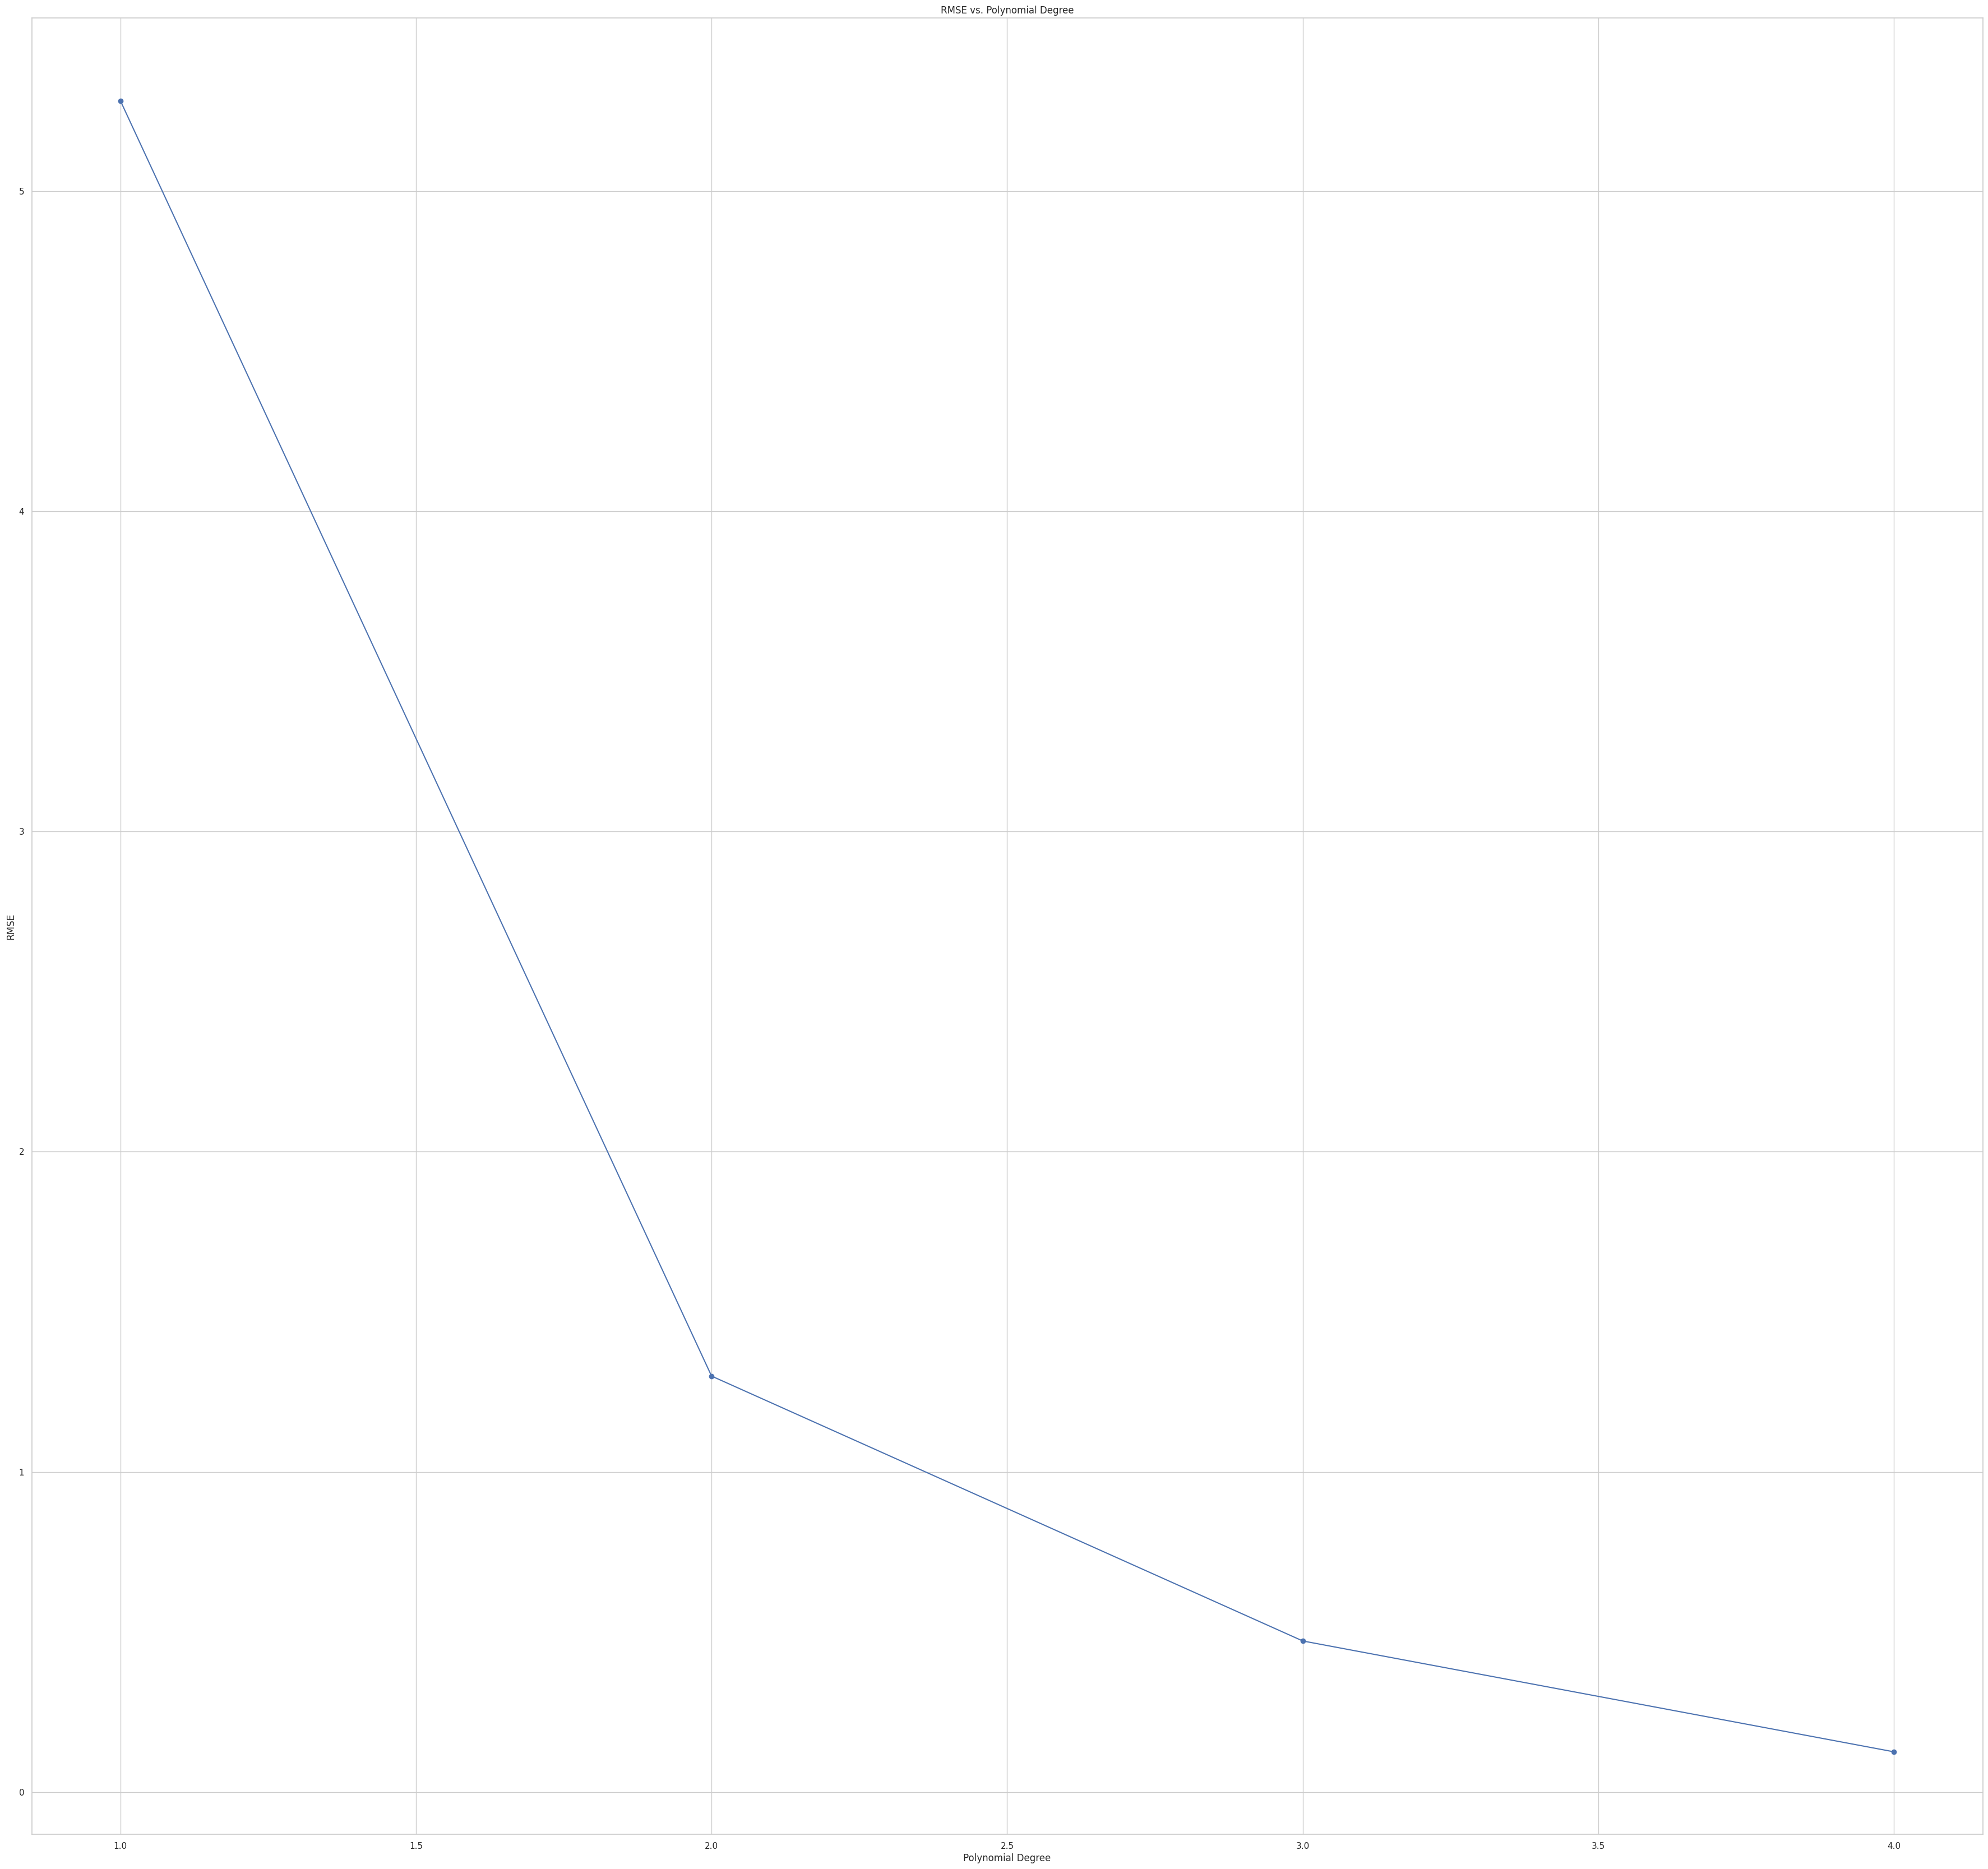

In [67]:
plt.plot(degrees, rmse, marker='o')
plt.title('RMSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

In [46]:
poly_degree = PolynomialFeatures(degree = 2)
X_train_pol = poly_degree.fit_transform(X_train)
X_test_pol = poly_degree.transform(X_test)

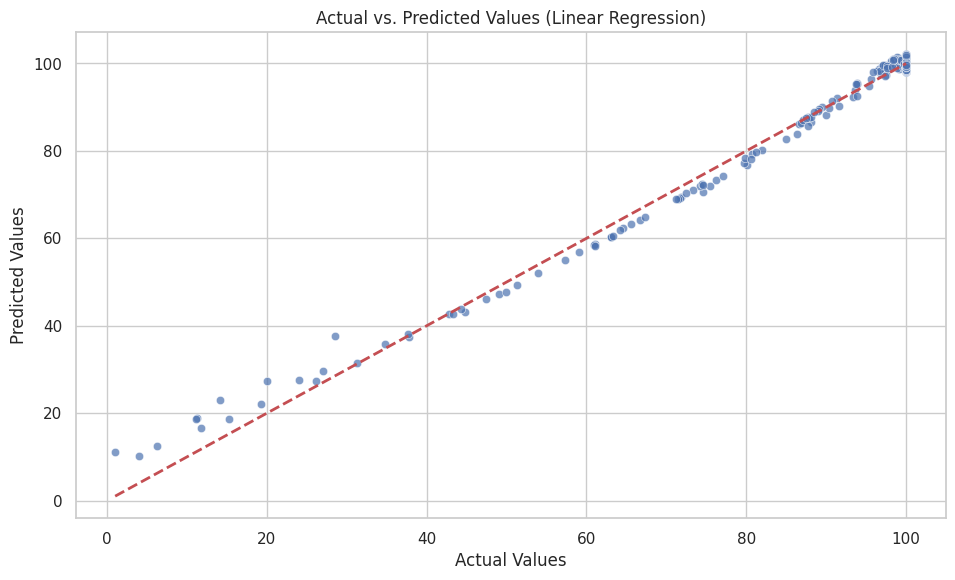

In [63]:
# Create a scatterplot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(x=y_test, y=y_pred_PR, color='b', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.show()

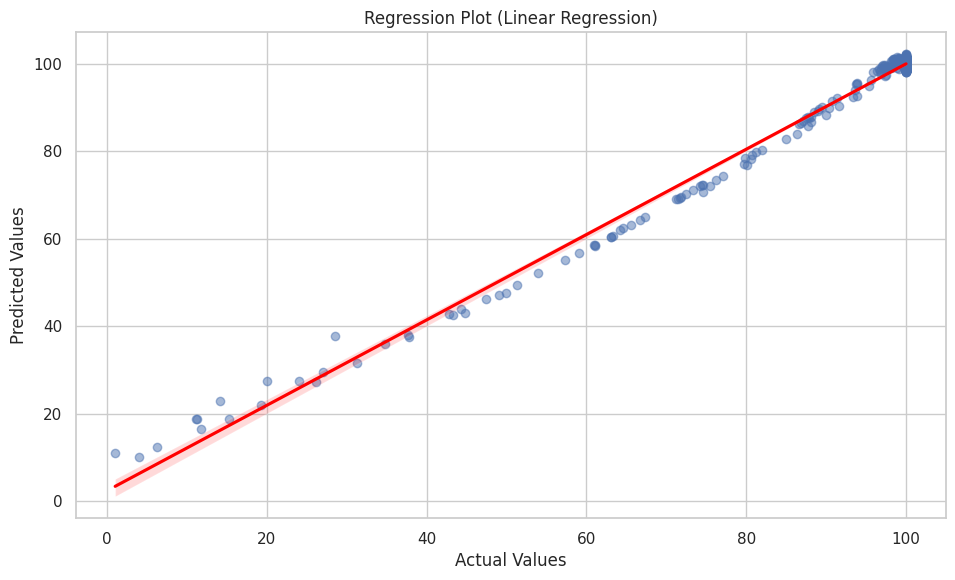

In [64]:
# Create a regression plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.regplot(x=y_test, y=y_pred_PR, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot (Linear Regression)")
plt.show()

Text(0.5, 1.0, 'Residuals vs. Fitted Values')

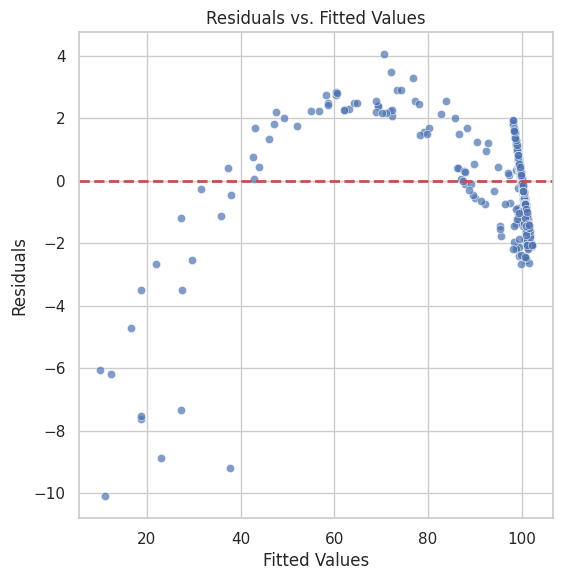

In [65]:
# Create residual plots
plt.figure(figsize=(12, 6))
# Residuals vs. Fitted Values
plt.subplot(1, 2, 1)
sns.set(style="whitegrid")
sns.scatterplot(x=y_pred_PR, y=y_test-y_pred_PR, color='b', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")

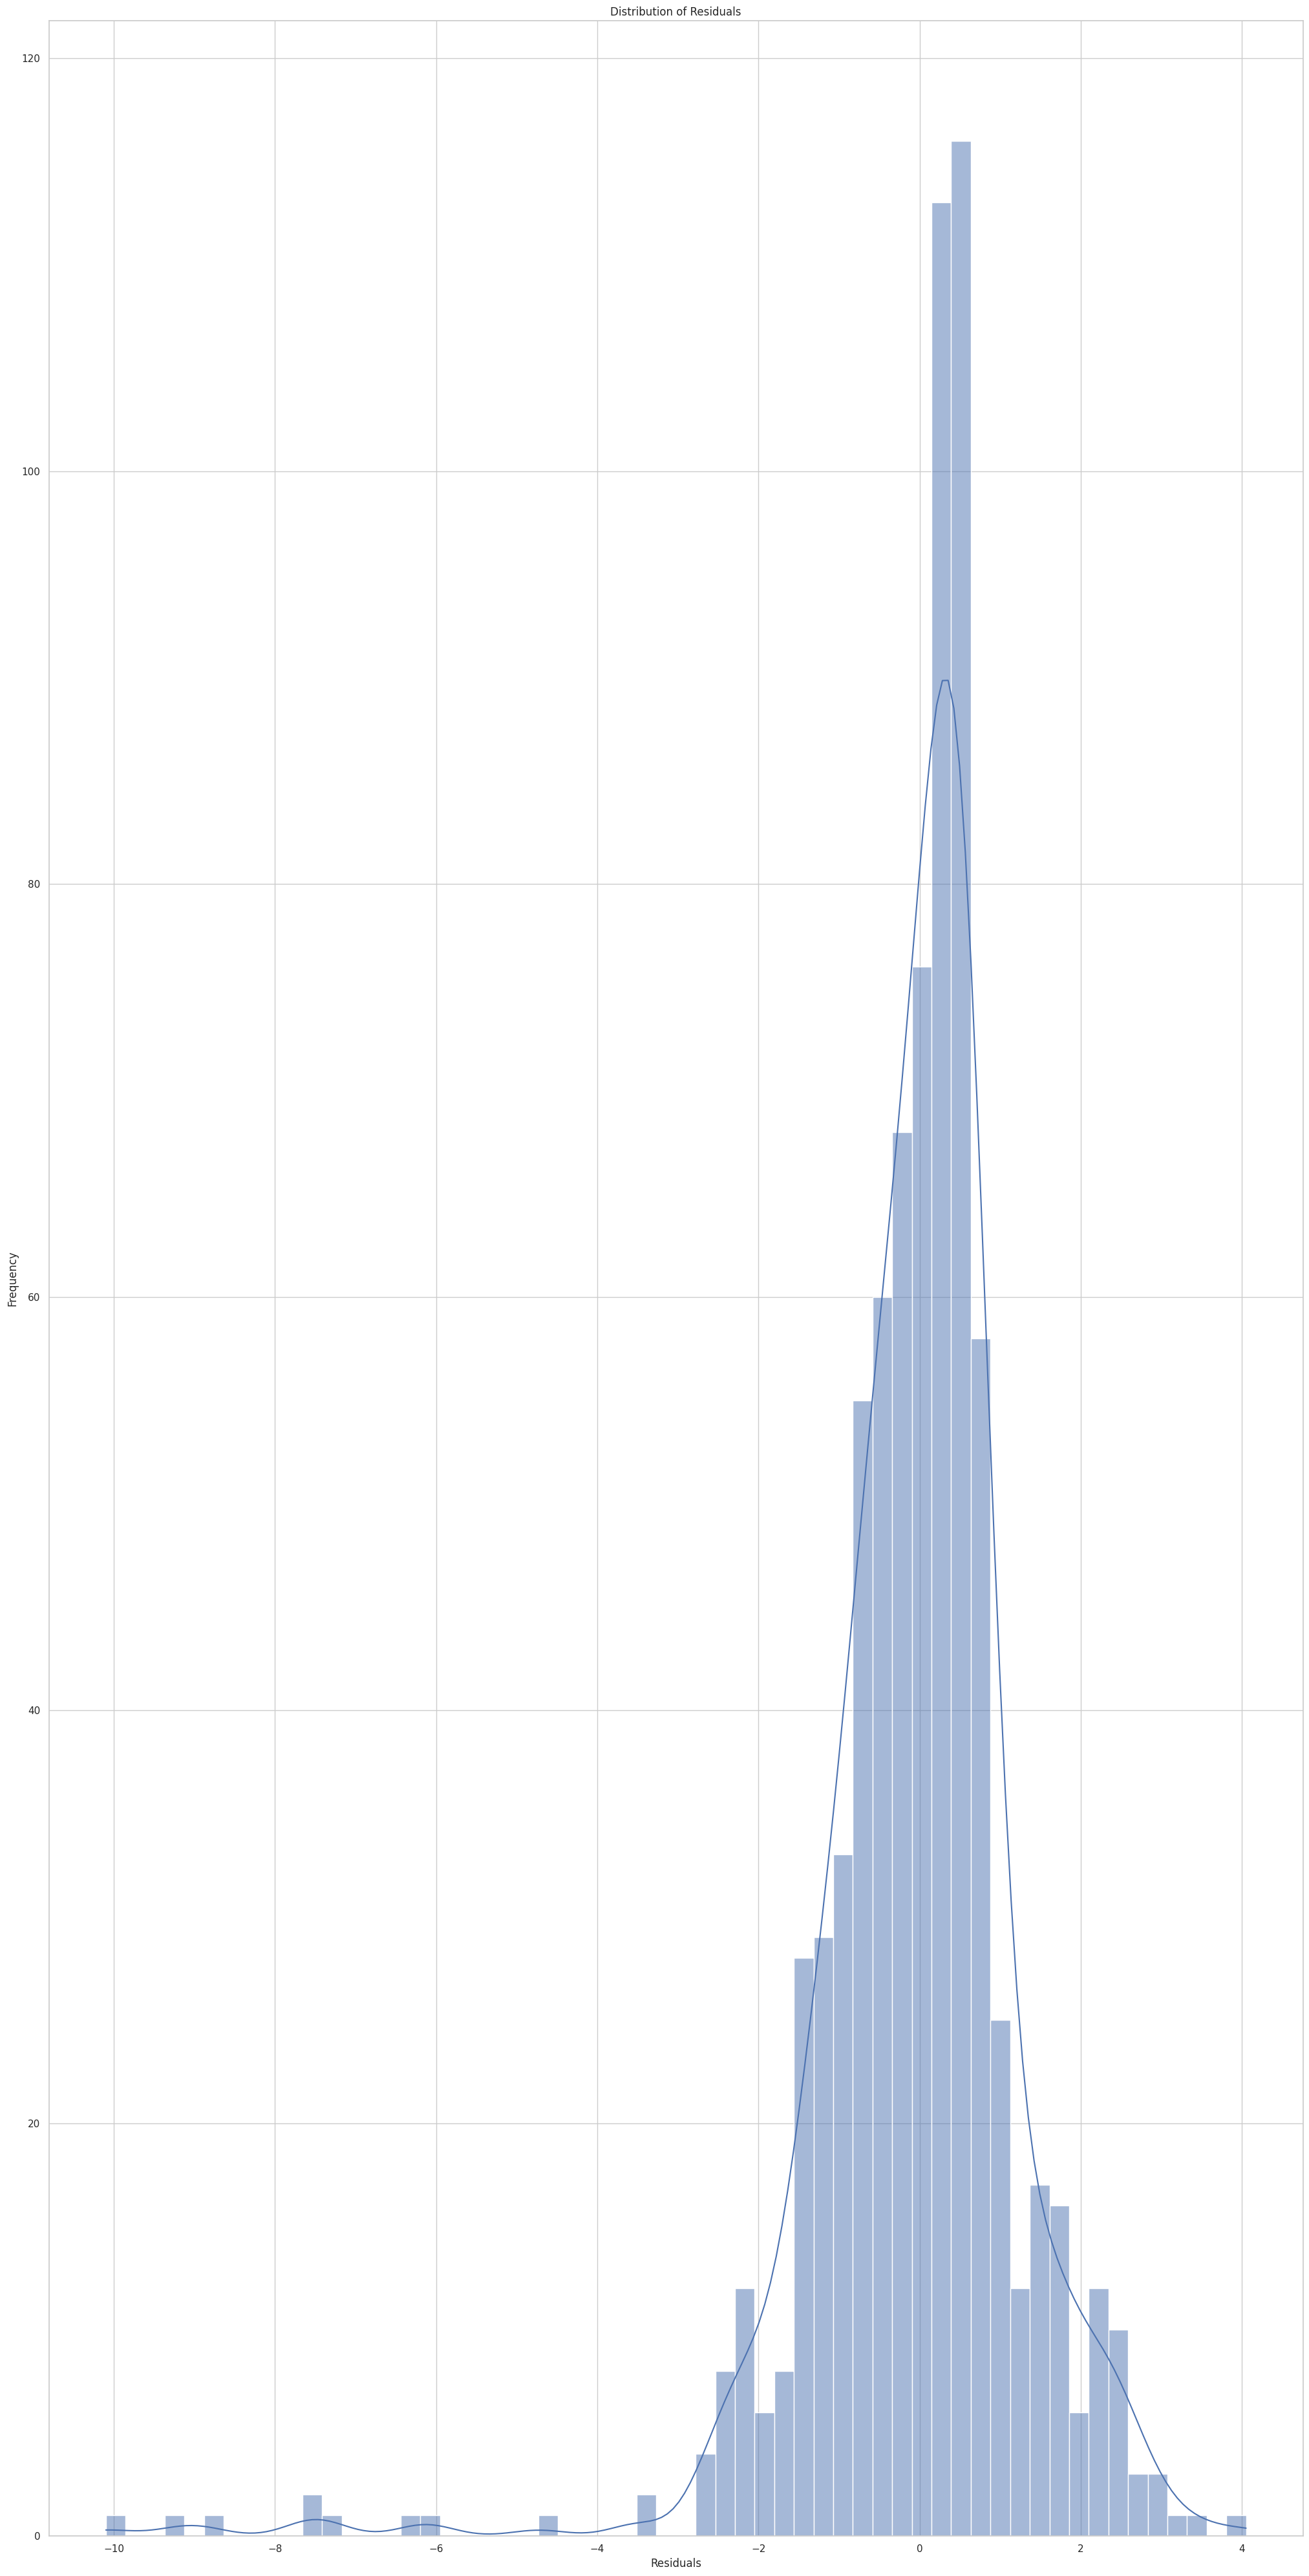

In [66]:
# Distribution of Residuals
plt.subplot(1, 2, 2)
sns.set(style="whitegrid")
sns.histplot(y_test - y_pred_PR, kde=True, color='b')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.tight_layout()
plt.show()